# Rede Neural para Acidentes em uma Usina Nuclear - Sem ruído

## Bibliotecas usadas na implementação da rede

In [1]:
import numpy as np # será usada para mexer com vetores e matrizes
import pandas as pd # será usada para mexer com o arquivo Excel
import matplotlib.pyplot as plt # será usada para mostrar os gráficos desejados
from sklearn.preprocessing import MinMaxScaler # será usada para normalizar os dados do Excel
from sklearn.model_selection import train_test_split # será usada para dividir o conjunto de dados do arquivo Excel
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score # será usada para analisar o            
                                                                                                        # funcionamento da rede
from tensorflow import random 
from tensorflow.keras import layers, models, optimizers # será usada na construção da rede

############Setando Semente Randomica
seed = 1
np.random.seed(seed)
random.set_seed(seed)

## Abrindo o arquivo Excel para leitura

In [2]:
dados = pd.read_excel("/content/sample_data/16_operational_scenarios.xlsx")

## Selecionando os dados de entrada/saída

In [3]:
entradas = dados.iloc[:,0:17]
saidas = dados.iloc[:,-1]

## Selecionando os dados que serão usados para treinamento, teste e validação

In [84]:
entradasTreino, entradasTeste, saidasTreino, saidasTeste = train_test_split(entradas, saidas, test_size=0.12)
entradasTreino, entradasValid, saidasTreino, saidasValid = train_test_split(entradasTreino, saidasTreino, test_size=0.12)

## Normalizando os dados de entrada

In [85]:
normalizer = MinMaxScaler(feature_range = (0, 1))
entradasTreino = normalizer.fit_transform(entradasTreino)
entradasValid = normalizer.transform(entradasValid)
entradasTeste = normalizer.transform(entradasTeste)

## Definindo as quantidas de entradas, saídas, neurônios funções de ativação, tipo de otimizador, função erro, tamanho do batch e o número de épocas

In [103]:
quant_entradas = entradasTreino.shape[1]
quant_saidas = 1
quant_neuronios = 40
funcaoAtivacao = "relu"
funcaoSaida = "linear"
optimizer = optimizers.Adam(lr=0.0007, beta_1=0.9, beta_2=0.999, epsilon=1E-8, decay=0.0)
funcaoErro ='mse'
batch_size = 50
epochs =  500

## Estrutrando a rede

In [104]:
model = models.Sequential()

model.add(layers.Dense(quant_neuronios,
                        activation=funcaoAtivacao, 
                        input_dim=quant_entradas))

#Camada Escondida 2
model.add(layers.Dense(quant_neuronios,activation=funcaoAtivacao))
model.add(layers.Dense(quant_neuronios,activation=funcaoAtivacao))
model.add(layers.Dense(quant_neuronios,activation=funcaoAtivacao))
model.add(layers.Dense(quant_neuronios,activation=funcaoAtivacao))
model.add(layers.Dense(quant_neuronios,activation=funcaoAtivacao))

#Camada de Saida
model.add(layers.Dense(quant_saidas,activation=funcaoSaida))

#Resumo do Modelo
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 40)                720       
_________________________________________________________________
dense_85 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_86 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_87 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_88 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_89 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_90 (Dense)             (None, 1)               

## Compilando a rede neural

In [105]:
model.compile(loss=funcaoErro, optimizer=optimizer)

## Treinando a rede neural

In [111]:
history = model.fit(entradasTreino, saidasTreino, 
          epochs=epochs, batch_size=batch_size, 
          validation_data=(entradasValid, saidasValid),
          shuffle=True,
          verbose=1)

Epoch 1/500
4/4 [==============================] - 0s 11ms/step - loss: 0.2868 - val_loss: 0.1130
Epoch 2/500
4/4 [==============================] - 0s 5ms/step - loss: 0.3749 - val_loss: 0.1262
Epoch 3/500
4/4 [==============================] - 0s 5ms/step - loss: 0.2884 - val_loss: 0.1443
Epoch 4/500
4/4 [==============================] - 0s 5ms/step - loss: 0.3512 - val_loss: 0.0760
Epoch 5/500
4/4 [==============================] - 0s 5ms/step - loss: 0.3391 - val_loss: 0.1221
Epoch 6/500
4/4 [==============================] - 0s 5ms/step - loss: 0.3015 - val_loss: 0.1273
Epoch 7/500
4/4 [==============================] - 0s 5ms/step - loss: 0.2993 - val_loss: 0.0941
Epoch 8/500
4/4 [==============================] - 0s 5ms/step - loss: 0.2777 - val_loss: 0.0654
Epoch 9/500
4/4 [==============================] - 0s 5ms/step - loss: 0.2780 - val_loss: 0.0578
Epoch 10/500
4/4 [==============================] - 0s 5ms/step - loss: 0.2506 - val_loss: 0.0720
Epoch 11/500
4/4 [==========

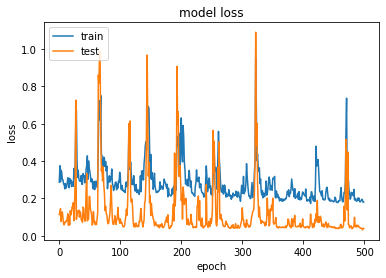

In [112]:
import matplotlib.pyplot as plt #Para Gerar Plots

plt.plot(history.history['loss'][0:500])
plt.plot(history.history['val_loss'][0:500])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Avaliando a rede neural e comparando as saídas obtidas com as reais

In [116]:
saidasPrevistas = model.predict(entradasTeste)

In [114]:
print('MAE:', mean_absolute_error(saidasTeste, saidasPrevistas))  
print('MSE:', mean_squared_error(saidasTeste, saidasPrevistas))  
print('RMSE:', np.sqrt(mean_squared_error(saidasTeste, saidasPrevistas)))
print('R2_Score:', r2_score(saidasTeste, saidasPrevistas))

MAE: 0.24220967292785645
MSE: 0.3876903012688179
RMSE: 0.622647814794863
R2_Score: 0.9198986980849551


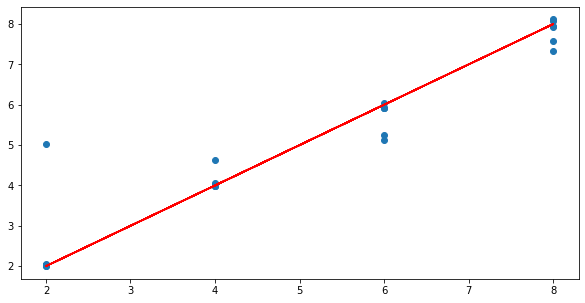

In [115]:
fig = plt.figure(figsize=(10,5))
plt.scatter(saidasTeste,saidasPrevistas)
plt.plot(saidasTeste,saidasTeste,'r')